# The Fourier Transform

The number of phenomena in the world that can be described using waveforms—functions of time, space, or some other variable is immense. Through the **Fourier tranform**, all waveforms can be expressed as the sum of simple sinusoids. By decomposing a signal into simple components, we can view  waveforms in an entirely new domain—the frequency domain.

![time_freq_domain.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/time_freq_domain.png)

![fourier_transform_fig.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/fourier_transform_fig.png)

The Fourier transform is like a mathematical prism:

![prism.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/prism.png)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'figure.figsize':(10,6)})

## Complex Numbers
Before we define the Fourier transform, let's briefly review complex numbers.

Recall that the **imaginary** number $i$ is defined as the square root of -1:

$i^2 = -1$
$i = \sqrt{-1}$

A **complex** number has the form
#### $a+bi$
where $a$ and $b$ are real numbers and $i$ is the imaginary number.

We can actually plot these complex numbers in a **2D-plane** if we treat the y-axis as the imaginary axis and the x-axis as the real number axis.

![complexNumberGraphing.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/complexNumberGraphing.png)

We must also recall **Euler's formula** ([the proof uses Taylor series](https://www.youtube.com/watch?v=jcrQ3rPUYjc)) that establishes a relationship between trigonometric functions and the complex exponential function:

#### $e^{ix} = cos(x) + i\ sin(x)$
> We recommend watching supplementary videos on your own if you would like to see how this formula works!

*Note: Python uses $j$ instead of $i$ to denote the imaginary unit. It also handles computation with complex numbers with relative ease.*

In [2]:
z1 = 1+2j
z1

(1+2j)

In [3]:
np.exp(z1)

(-1.1312043837568135+2.4717266720048188j)

In [4]:
np.exp(z1).real, np.exp(z1).imag

(-1.1312043837568135, 2.4717266720048188)

![complex_plane.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/complex_plane.png)

> A complex number has a **magnitude** (amplitude) and an **angle** (phase).

In [5]:
# Magnitude and angle of the complex number
mag = abs(z1)
ang = np.angle(z1)

print(mag, ang)

2.23606797749979 1.1071487177940904


In signal processing, signals that vary *periodically over time* are often characterized as a set of sinusoidal functions (**Fourier analysis**). Using Euler's formula, we can more conveniently express them as the sum of exponential functions with imaginary exponents.

## Fourier Transform Definition

The Fourier transform is a function that takes a signal in the time domain $s(t)$ and translates it into one in the frequency domain, $S(\omega)$.  The *inverse* Fourier transform takes a signal in the frequency domain $S(\omega)$ and translates it into one in the time domain $s(t)$:

#### $S(\omega) = \mathcal{F}[s(t)] = \int_{-\infty}^\infty s(t) e^{-i \omega t} dt$
#### $s(t) = \mathcal{F}^{-1}[S(\omega)] = \frac{1}{2\pi}\int_{-\infty}^\infty S(\omega) e^{i \omega t} d\omega$

If you're interested in getting some intuition behind this math, you should check out this [pretty nifty video](https://www.youtube.com/watch?v=spUNpyF58BY).

For our purposes, we will just be using the **discrete** version.

## Discrete Fourier Transform (DFT)

#### $S(m) = \sum_{n=0}^{N-1} s(n) e^{-i 2 \pi m \left({\frac{n}{N}}\right) }$

Where:
- $N$ is the total number of samples
- $s(n)$ is the $n^{th}$ sample for the time-domain function 
- $S(m)$ is the output of the DFT for the $m^{th}$ frequency. (This frequency corresponds to sine waves that complete $m$ cycles over the full sampling interval—i.e. those that have a frequency of $\frac{m}{T_{sample}}$ Hz.)

### What does the Fourier transform give us?

- The amplitudes of simple sine waves that comprise the input time-domain signal
- The phases (similar to starting position) of the sine waves that comprise the time-domain signal

### What sine wave frequencies are measured?

- Frequencies in the half-open interval $[0,\frac{N}{2 T_{sample}})$ Hz in steps of $\frac{1}{T_{sample}}$ Hz. (Note: half-open just means it doesn't include the point $\frac{N}{2 T_{sample}}$ Hz.)

- **Example**: If your sample rate is $100$ Hz and you calculate a DFT of 200 samples ($T_{sample} = 2 \ sec$), the DFT will return the frequency components of the input signal for frequencies from $0$ to $49.5$ Hz in steps of $0.5$ Hz.

What the Fourier transform is in one sentence:
![fourier1sentence.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/fourier1sentence.png)

Here's a sample signal that we'll be using for some examples below:

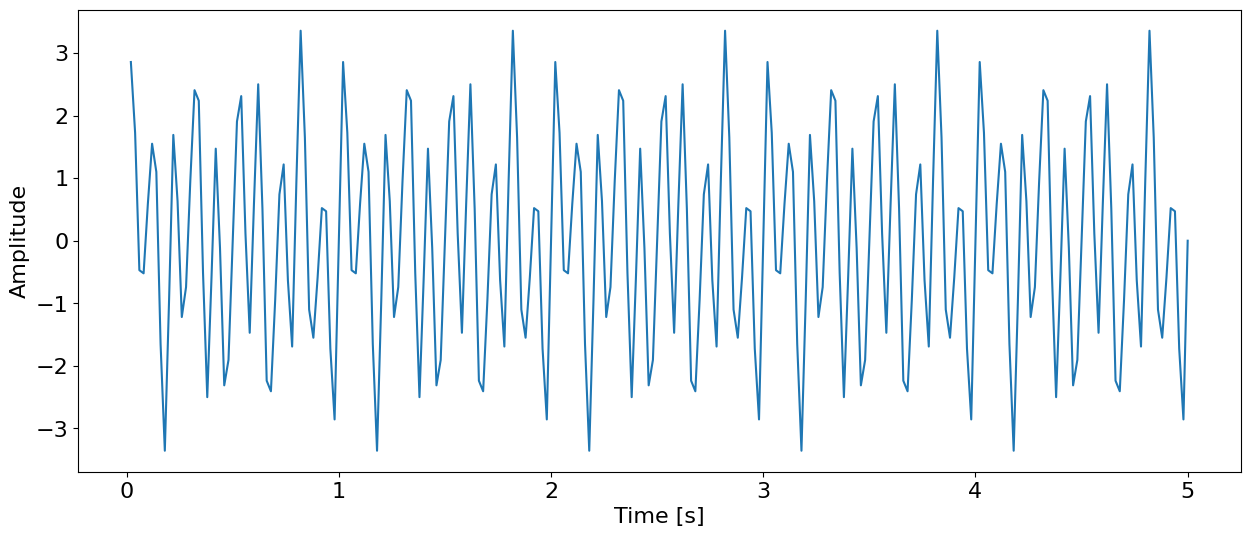

In [6]:
num_sec = 5         # (sec) sampling period
f_samp = 50         # (Hz) samples per second

# Make a signal by combining three sinusoids
t = np.linspace(1/f_samp, num_sec, f_samp*num_sec)
s = (1.0 * np.sin(4  * 2 * np.pi * t)
   + 0.5 * np.sin(15 * 2 * np.pi * t)
   + 2.0 * np.sin(10 * 2 * np.pi * t))

# Plot that signal
plt.figure(figsize=(15,6))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

### *Aside:*
The **fast Fourier transform (FFT)**, which you will see used going forward, takes in a discrete signal as input as opposed to a continuous signal (Fourier transform). This transformation outputs an array of length $N$ corresponding to $N/2$ frequencies and $N/2$ of their complex congugates.

For real number inputs, $FFT[n]$ is the complex conjugate of $FFT[N - n]$. This is true for all numbers in the sequence.

Because the second half of the sequence gives us no new information, we can already conclude that half of the FFT sequence is the output we need.

In [7]:
# Look at the output of the FFT
fft = np.fft.fft(s)

for i in range(3):
    print("\nValue at index {}:\t{}".format(i, fft[i]),
          "\nValue at index {}:\t{}".format(fft.size - i, fft[-i]))


Value at index 0:	(-1.1368683772161603e-13+0j) 
Value at index 250:	(-1.1368683772161603e-13+0j)

Value at index 1:	(-5.073446904741021e-13-2.5791803585463937e-13j) 
Value at index 249:	(-5.065799689113223e-13+2.5757631081831636e-13j)

Value at index 2:	(4.3713603442380156e-13+7.568664833189794e-14j) 
Value at index 248:	(4.3713603442380156e-13-7.568664833189809e-14j)


## Inverse Fourier Transform (IFT)

Recall:

### Discrete Fourier Transform (DFT) 
#### $S[m] = \sum_{n=0}^{N-1} s[n] e^{-i 2 \pi m \left({\frac{n}{N}}\right) }$

### Inverse Discrete Fourier Transform (IDFT)
#### $s[n]=\frac{1}{N} \sum_{m=0}^{N-1} S[m] e^{-i 2 \pi m \left({\frac{n}{N}}\right) }$

**where**:
* $N$ is the total number of samples
* $s[n]$ is the $n^{th}$ sample in the time domain 
* $S[m]$ is the $m^{th}$ sample in the frequency domain 

In [8]:
# Take the Fourier transform
# Then take the inverse Fourier transform

fft = np.fft.fft(s)
s_recon = np.fft.ifft(fft)

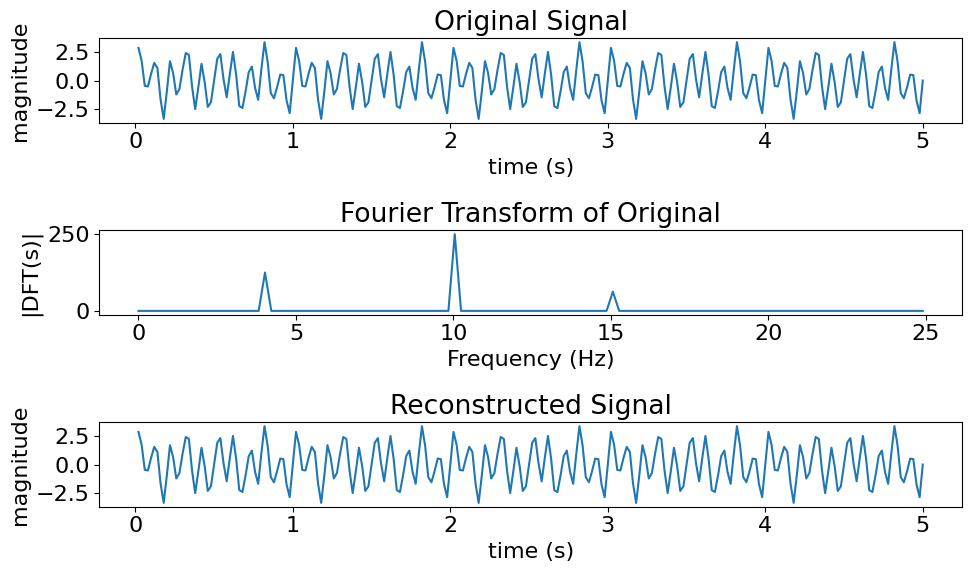

In [9]:
# Plot it!

plt.figure()
plt.subplot(3,1,1)
plt.plot(t,s)
plt.title('Original Signal')
plt.xlabel('time (s)')
plt.ylabel('magnitude')

# Plot DFT (plot abs value to avoid plotting real/imag parts separately)

T_samp = t[-1]-t[0] #get length of full sampling interval
freq_vals = np.arange(0, (len(t)-1)/2, 1) / T_samp #get frequency values up to nyquist frequency
ampVals = np.abs(fft[:len(freq_vals)])

plt.subplot(3,1,2)
plt.plot(freq_vals, ampVals)
plt.title('Fourier Transform of Original')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|DFT(s)|')

plt.subplot(3,1,3)
plt.plot(t,s_recon.real)
plt.title('Reconstructed Signal')
plt.xlabel('time (s)')
plt.ylabel('magnitude')

plt.tight_layout()

### Yay!
We can decompose a signal into its component frequencies and reconstruct it back to the time domain!

## Spectrum & Spectrogram

The **spectrum** of a signal, or a frequency spectrum, plots amplitude and phase for the sinusoidal components of the signal as a function of frequency.

A **spectrogram** is a visual representation of the spectrum of frequencies of sound or other signal as they vary with time. Spectrograms are sometimes called sonographs, voiceprints, or voicegrams.
> Spectrograms are great representations because they capture both time and frequency information!

In [6]:
import os
# Grab a sample .wav file (audio file) for this notebook
os.system('wget https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav')

--2024-07-16 07:46:38--  https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99852 (98K) [audio/wav]
Saving to: ‘newt.wav’

     0K .......... .......... .......... .......... .......... 51% 1.84M 0s
    50K .......... .......... .......... .......... .......   100% 13.1M=0.03s

2024-07-16 07:46:39 (3.17 MB/s) - ‘newt.wav’ saved [99852/99852]



0

In [7]:
from scipy import signal
import scipy.io.wavfile

(sample_rate, y_newt) = scipy.io.wavfile.read("./newt.wav")
y_newt=y_newt-y_newt.mean() # Subtract mean signal to get rid of 0 Hz component

sample_freq, segment_time, spec_data = signal.spectrogram(y_newt,sample_rate)

Text(0, 0.5, '|DFT[s(t)]|')

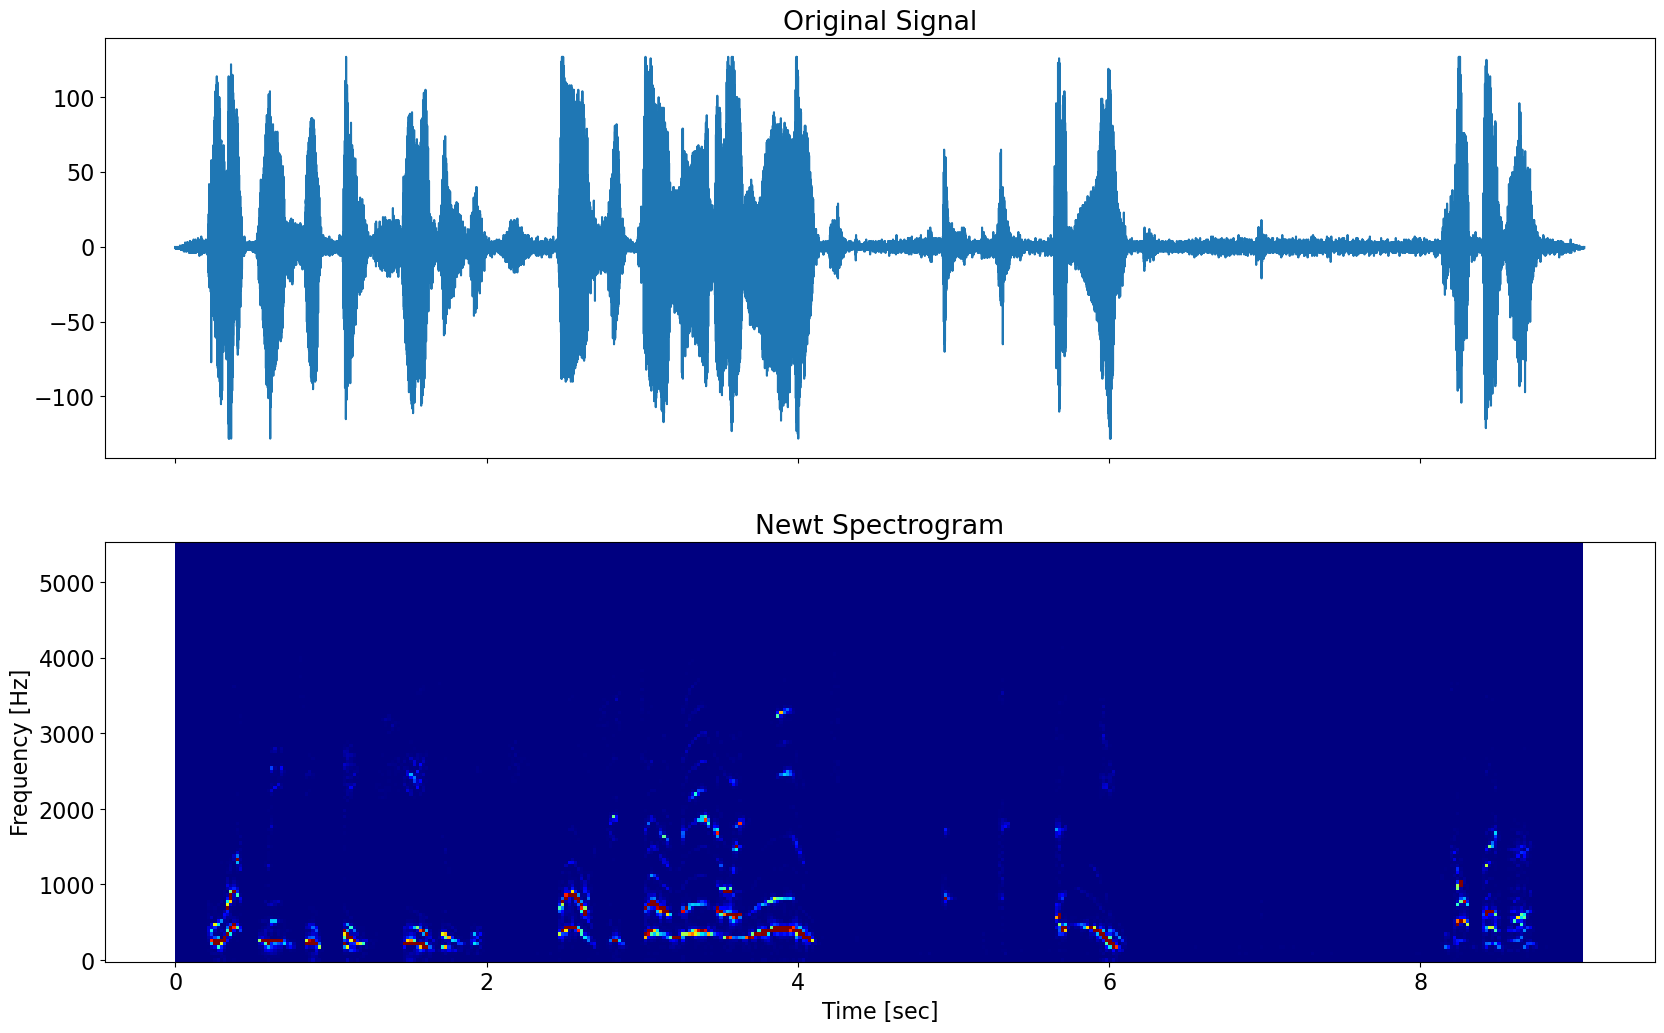

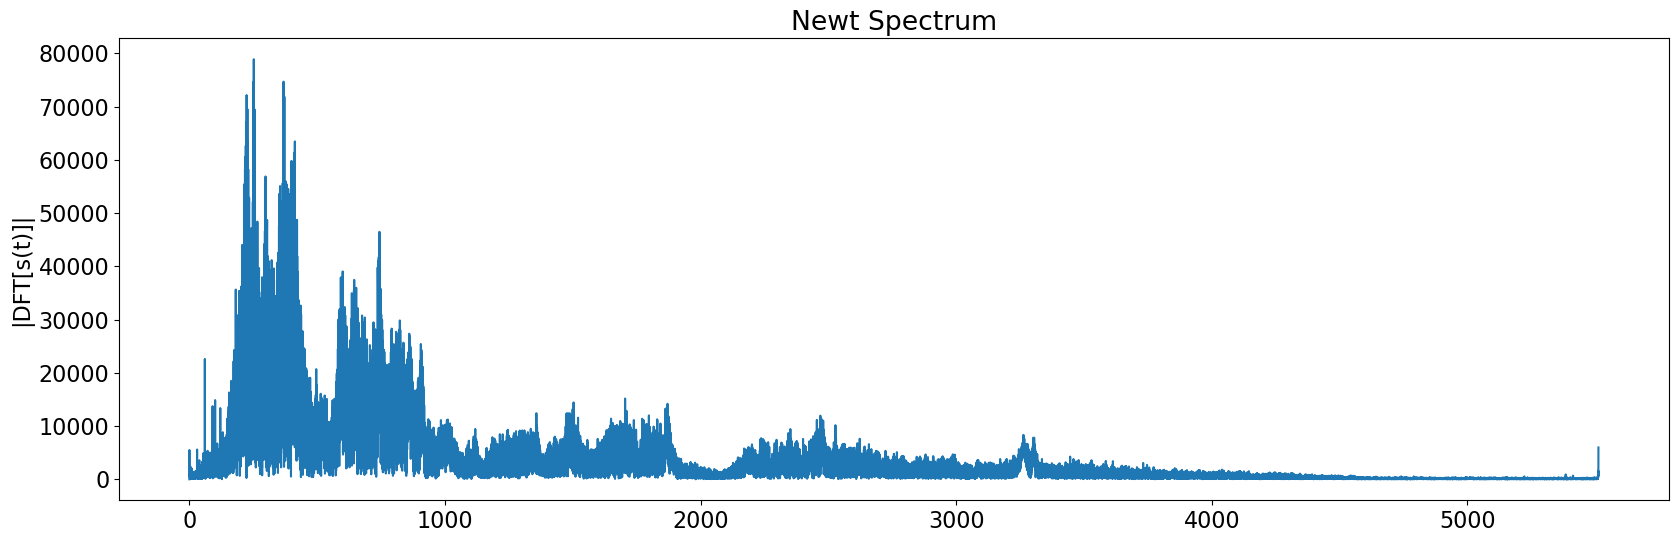

In [8]:
# PLOT

t = np.arange(0, len(y_newt)/sample_rate, 1/sample_rate)
N = y_newt.size  
T = t[1]-t[0]

fft_newt=np.fft.fft(y_newt)

f, (ax1, ax2) = plt.subplots(2, 1, sharex='col', sharey='row',figsize=(20,12))

ax1.plot(t,y_newt)
ax1.set_title('Original Signal')

ax2.pcolormesh(segment_time, sample_freq, spec_data,cmap='jet',vmax=10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Newt Spectrogram")

plt.figure(figsize = (20,6))
plt.title("Newt Spectrum")
T_samp = t[-1]-t[0] #get length of full sampling interval in time domain
freq_vals = np.arange(0, (len(t)-1)/2, 1) / T_samp #get frequency bin values up to Nyquist frequency
amp_vals = np.abs(fft_newt[:len(freq_vals)]) #get amplitude values for all these frequency bins
plt.plot(freq_vals, amp_vals)
plt.ylabel('|DFT[s(t)]|')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2703ed7-f8b4-40f5-8dd1-77fe823e4d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>